<h1>DecisionTreeClassifier<h1>

  
 <h5>Anas Ba Ragaa _ B00075797<h5>
 <h5>Rayan Ben Daya _ B00073990 <h5>
 <h5>Rashid Alnuaimi  _ B00071921<h5>

In [3]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
import pandas as pd

def save_array(a,filename):
    with open(filename, 'wb') as f:
        np.save(f, a)
def read_array(filename):
    with open(filename, 'rb') as f:
        a = np.load(f)
    return a


X_FILE='x_file.txt'
Y_FILE='y_file.txt'

In [4]:

##################################
        #Loading and Encodign #
####################################
#Machine Learning
#Assignment 2

#part 1
input_file = "Churn_Modelling.csv"
# reading file to pandas dataframe
df_ori = pd.read_csv(input_file, header = 0)
# dropping the unrelated columns
df=df_ori.drop(columns=['CustomerId', 'Surname','RowNumber'])
# Encoding the catogerical features to numerical by replacing their values with numbers
df=df.replace(["Female","Male"],[1,0])
df=df.replace(["France","Spain","Germany",],[0,1,2])
#dataset after manipulation

# Sampling to make the data balanced
df=df.sample(frac=1).groupby('Exited', sort=False).head(2000)
df
y=df['Exited'].to_numpy()
y=y.astype(int)
x=df.drop(columns=['Exited']).to_numpy()
x=x.astype(int)
x
# run only once to save file for consistency
save_array(y,Y_FILE)
save_array(x,X_FILE)





In [36]:
#Loading x and y from files
x=read_array(X_FILE)
y=read_array(Y_FILE)



In [70]:
#part 2 

train_scores=[]
test_scores=[]
for i in range(0, 30):
    clf_2 = tree.DecisionTreeClassifier(splitter='random')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    clf_2=clf_2.fit( x_train,y_train)
    
    train_scores.append(clf_2.score(x_train,y_train))
    test_scores.append(clf_2.score(x_test,y_test))
    print(clf_2.tree_.max_depth)
    
print (train_scores)
print (test_scores)



25
24
24
25
23
22
23
24
23
24
22
29
25
22
22
23
22
24
27
23
22
22
24
25
24
28
26
24
24
24
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.7094370860927153, 0.7185430463576159, 0.7127483443708609, 0.7350993377483444, 0.7044701986754967, 0.7326158940397351, 0.7094370860927153, 0.734271523178808, 0.6986754966887417, 0.7549668874172185, 0.7458609271523179, 0.7350993377483444, 0.7160596026490066, 0.7210264900662252, 0.7168874172185431, 0.7251655629139073, 0.7168874172185431, 0.7152317880794702, 0.7251655629139073, 0.7210264900662252, 0.7077814569536424, 0.7442052980132451, 0.7251655629139073, 0.7102649006622517, 0.7259933774834437, 0.7326158940397351, 0.7425496688741722, 0.7367549668874173, 0.7301324503311258, 0.7259933774834437]


In [51]:
#part 3 

#Do we use random?
clf_3 = tree.DecisionTreeClassifier()

cv_results = cross_validate(clf, x, y, cv=10)
print(cv_results)

{'fit_time': array([0.0329864 , 0.03498483, 0.02519321, 0.02765369, 0.02285814,
       0.02369547, 0.02346683, 0.0257144 , 0.02410746, 0.02375317]), 'score_time': array([0.        , 0.0010097 , 0.00096416, 0.        , 0.00129938,
       0.        , 0.        , 0.0009706 , 0.00100279, 0.00099063]), 'test_score': array([0.72350993, 0.72516556, 0.7384106 , 0.70529801, 0.72350993,
       0.70695364, 0.75496689, 0.72968491, 0.74958541, 0.72802653])}


In [67]:
#part 4 
#model 2
train_scores=[]
test_scores=[]
best_depth=0
# Change other parameters as well
highest_train_score=0
highest_test_score=0
best_fitted_tree=tree.DecisionTreeClassifier()
for i in range (4,27):
    #Do we use randon here
    clf_4=tree.DecisionTreeClassifier(max_depth=i, )
    for j in range (0,30):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        temp_clf=clf_4.fit( x_train,y_train)
        temp_train_score=temp_clf.score(x_train,y_train)
        temp_test_score=temp_clf.score(x_test,y_test)
            
        if(temp_train_score>highest_train_score):
            highest_train_score=temp_train_score
                
        if(temp_test_score>highest_test_score):
            highest_test_score=temp_test_score
   #Update using test score only             
        if(temp_train_score==highest_train_score and temp_test_score==highest_test_score ):
            best_fitted_tree=temp_clf
            best_depth=i
        # Do we report average or each point
            
print('highest_train_score',highest_train_score)            
print('highest_test_score : ',highest_test_score)
print('best_dept',best_depth)


highest_train_score 1.0
highest_test_score :  0.8170529801324503
best_dept 5


[Text(174.23265306122448, 199.32, 'X[3] <= 42.5\ngini = 0.448\nsamples = 4829\nvalue = [3190, 1639]'),
 Text(99.07346938775511, 163.07999999999998, 'X[6] <= 2.5\ngini = 0.332\nsamples = 3163\nvalue = [2497, 666]'),
 Text(54.66122448979592, 126.83999999999999, 'X[6] <= 1.5\ngini = 0.306\nsamples = 3059\nvalue = [2482, 577]'),
 Text(27.33061224489796, 90.6, 'X[1] <= 1.5\ngini = 0.407\nsamples = 1615\nvalue = [1155, 460]'),
 Text(13.66530612244898, 54.359999999999985, 'X[5] <= 54704.0\ngini = 0.359\nsamples = 1174\nvalue = [899, 275]'),
 Text(6.83265306122449, 18.119999999999976, 'gini = 0.475\nsamples = 297\nvalue = [182, 115]'),
 Text(20.49795918367347, 18.119999999999976, 'gini = 0.298\nsamples = 877\nvalue = [717, 160]'),
 Text(40.99591836734694, 54.359999999999985, 'X[3] <= 33.5\ngini = 0.487\nsamples = 441\nvalue = [256, 185]'),
 Text(34.16326530612245, 18.119999999999976, 'gini = 0.389\nsamples = 193\nvalue = [142, 51]'),
 Text(47.82857142857143, 18.119999999999976, 'gini = 0.497\n

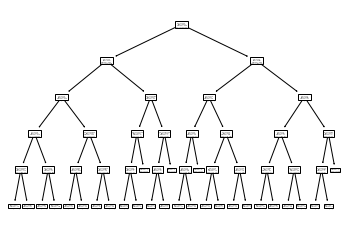

In [68]:
tree.plot_tree(best_fitted_tree)


In [ ]:
#part 4 
#model 3
train_scores_3=[]
test_scores_3=[]
best_depth_3=0

highest_train_score_3=0
highest_test_score_3=0
best_fitted_tree_3=tree.DecisionTreeClassifier()
for i in range (4,27):
    #Do we take best avg?
    clf_4_3=tree.DecisionTreeClassifier(max_depth=i)
    cv_results = cross_validate(clf, x, y, cv=10)
    
    
#Do we plot 2d or 3d